In [42]:
# 导入需要的库
import pandas as pd
import numpy as np
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from instrument_utility import *
import warnings 

warnings.filterwarnings("ignore")
plt.style.use('ggplot')
"""
1.读取ETF一年的周线数据
2.1 get_ETF_features() 获取指数收益率排名(降序)后75%的资产代码
2.2 get_ETF_SHARP() 获取(1.sharp ratio 大于1.1 
                         2.上市超过400天
                         3.管理费小于等于0.5
                         4.托管费小于等于0.1
                         )
    的资产代码
3. 返回(符合上述条件)资产的周线数据

"""

def format_str_code(se):
    return re.sub(r'(^close_hfq_last)', "", str(se)) #替换非数字的字符,去除ETF代码中的特殊字符
def get_weekly_ETF_data_index(path='D:\\Quant_Code\\data\\ETF_weekly\\weekly_ETF_hfq20220113.csv'):
    df_list =list()
    df = pd.read_csv(path)
   
    cols =['date','code','close_hfq_last']
    _,codes,names = InstrumentUtility().get_ETF_features()
    #codes,names,_ = InstrumentUtility().get_ETF_SHARP()
    codes_dict =  InstrumentUtility().get_ETF_names()
    
    df_t = df[cols].copy()
    for code in codes:        
        df_s = df_t[df_t['code']==code].copy()
        if df_s.shape[0] >= 52:        
            df_s = df_s.iloc[-52:].copy()
            df_s.set_index(['date','code'],inplace=True)
            df_list.append(df_s)
    df_res =pd.concat(df_list,axis=0)
    df_res = df_res.unstack().copy()
    df_res.columns  = [''.join(col) for col in df_res.columns.values] #把双层索引连接成字符串
    
    df_res.columns = [format_str_code(i) for i in df_res.columns.values] #保留双层索引数字部分
    df_res.columns = [i +':'+ codes_dict[i] for i in df_res.columns.values]
     
    # return df_res.unstack()
    df_res.fillna(method='bfill',inplace=True)
    return  df_res

df = get_weekly_ETF_data_index()
print(df.shape)

print(df.head())

(52, 18)
            159805.SZ:传媒ETF  159992.SZ:创新药ETF  159993.SZ:龙头券商ETF  \
date                                                               
2021-01-17            1.111             1.506              1.265   
2021-01-24            1.100             1.416              1.197   
2021-01-31            1.047             1.502              1.148   
2021-02-07            1.075             1.593              1.185   
2021-02-14            1.116             1.512              1.206   

            510010.SH:180治理ETF  510020.SH:超大盘ETF  510030.SH:价值ETF  \
date                                                                
2021-01-17               1.548          0.400970            6.483   
2021-01-24               1.488          0.386325            6.343   
2021-01-31               1.510          0.395314            6.480   
2021-02-07               1.566          0.418342            6.606   
2021-02-14               1.605          0.420059            6.814   

            510160.SH:产业升级ETF 

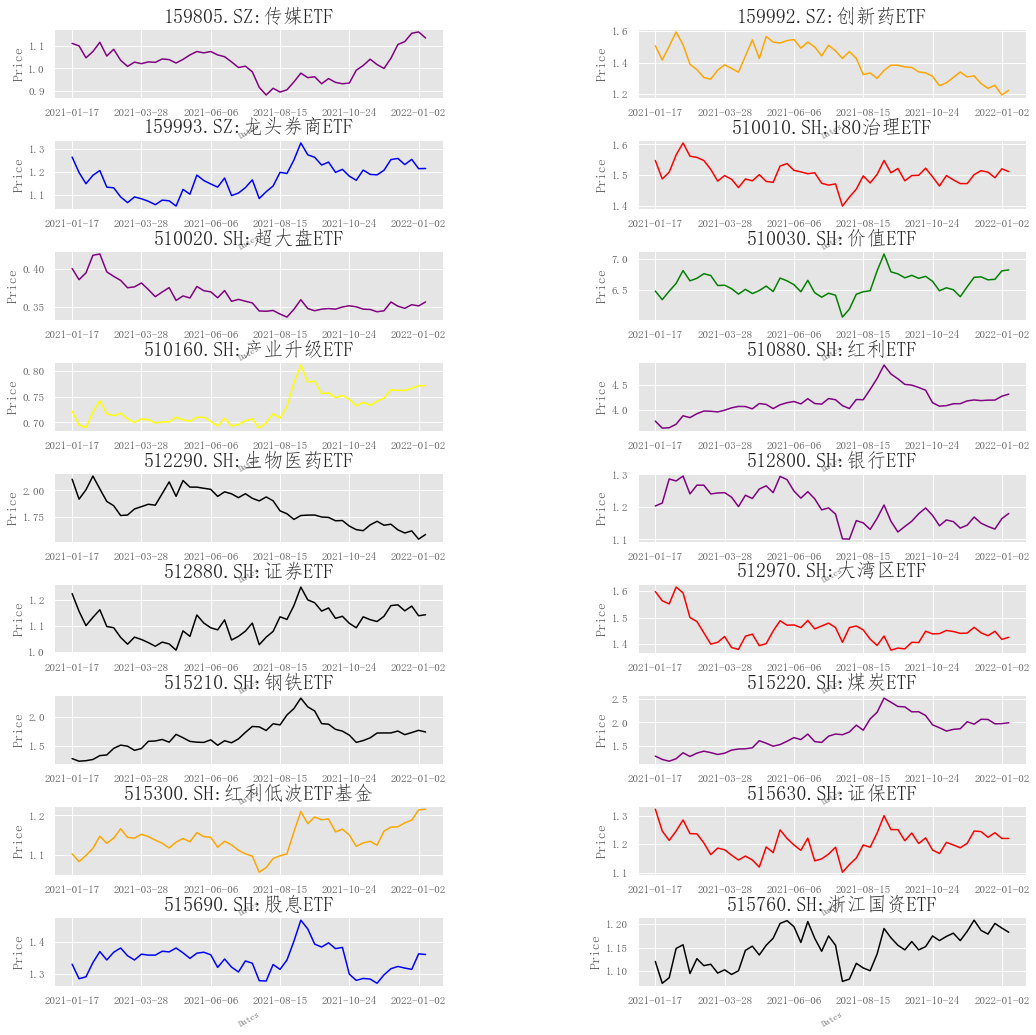

In [43]:
import pylab as mpl     #import matplotlib as mpl
import matplotlib.ticker as ticker
import random 
import matplotlib.pyplot as plt
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


# codes, names = get_ETF_codes()
# code_dict = dict(zip(codes,names))

fig1 =plt.figure(figsize=(20,36))
plt.subplots_adjust(hspace=.6,wspace=.5) # it adds space in between plots
if (len(df.columns) % 2 ) == 0:
    m = len(df.columns)
else:
    m = int(round(len(df.columns),-1))

for i in range(0,len(df.columns)):
    plt.subplot(m,2,i+1)
    ax = plt.gca()    
    ax.plot(df[df.columns[i]], color =random.choice(['green','red','blue','yellow','black','purple','orange']))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    # ax.set_ylim(0,8)
    ax.set_xlabel('Dates',fontsize=9,rotation=30)
    ax.set_ylabel('Price',fontsize =14)
    ax.set_title(df.columns[i],fontsize =20)
    fig1.subplots_adjust(right=0.8)  #把图例往左移动

plt.show()
fig1.savefig('D:\\Quant_Code\\data\\plot_ETF\\prices_sharp_filt.png',dpi=fig1.dpi)



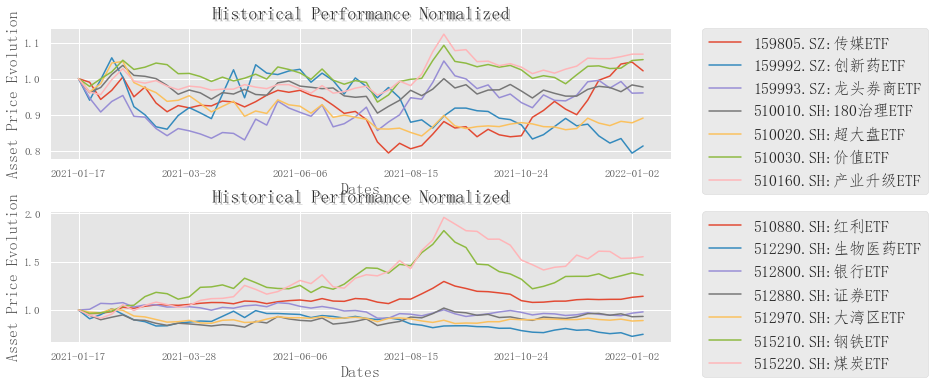

In [44]:
normalized_series = df/df.iloc[0]
normalized_series.head()
from matplotlib import patheffects
fig2 =plt.figure(figsize=(15,26))
plt.subplots_adjust(hspace=.4,wspace=.5) # it adds space in between plots
item,m = divmod(len(df.columns),7)

item,m = divmod(len(df.columns),7)
if len(df.columns) % 2 == 0:
    x = [ 7*i for i in range(0,item+1)] 
    
else:
    x = [ 7*i for i in range(0,item+1)] 
    tail = x[-1] + m
    x= x+ [tail]
    
# x = [0,7,14,21,28,35,42,49,56]
for i in range(len(x)-1):
    plt.subplot(8,1,i+1)
    ax = plt.gca()
    ax.plot(normalized_series.iloc[:,x[i]:x[i+1]])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

    title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                            verticalalignment = 'bottom')
    title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
    pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                        alpha = 0.8)
    xlabel_obj = plt.xlabel('Dates', fontsize = 16)
    ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
    
    legend_list = list()
    for i in range(x[i],x[i+1]):
        legend_list.append(df.columns[i])


    plt.legend(legend_list,fontsize = 16, loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) #把图例放到外面
    fig2.subplots_adjust(right=0.7)  #把图例往左移动
plt.show()
fig2.savefig('D:\\Quant_Code\\data\\plot_ETF\\historical_performance_normalized_sharp_filt.png')

In [45]:
df_returns = np.log(df/df.shift(1))
df_returns.dropna(inplace=True)
df_returns.head()
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =df_returns.mean() * 52 *100
stats['Annualized Volatility(%)'] = df_returns.std() * np.sqrt(52)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']
path = 'D:\\Quant_Code\\data\\sharp_ratio\\sharp_ratio.csv'
stats.to_csv(path,encoding='gbk')
stats.sort_values('Annualized Returns(%)',ascending=False,inplace=True)

print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')


----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
515220.SH:煤炭ETF,44.7836,37.9437,1.18026
515210.SH:钢铁ETF,31.4234,33.2334,0.945535
510880.SH:红利ETF,13.5509,16.3799,0.827289
515300.SH:红利低波ETF基金,10.037,12.6915,0.790846
510160.SH:产业升级ETF,6.69507,14.4207,0.464267
515760.SH:浙江国资ETF,5.57979,17.7961,0.31354
510030.SH:价值ETF,5.24336,15.023,0.349022
515690.SH:股息ETF,2.34223,15.8948,0.147358
159805.SZ:传媒ETF,2.17912,20.7722,0.104906
512800.SH:银行ETF,-1.96825,17.6748,-0.111359


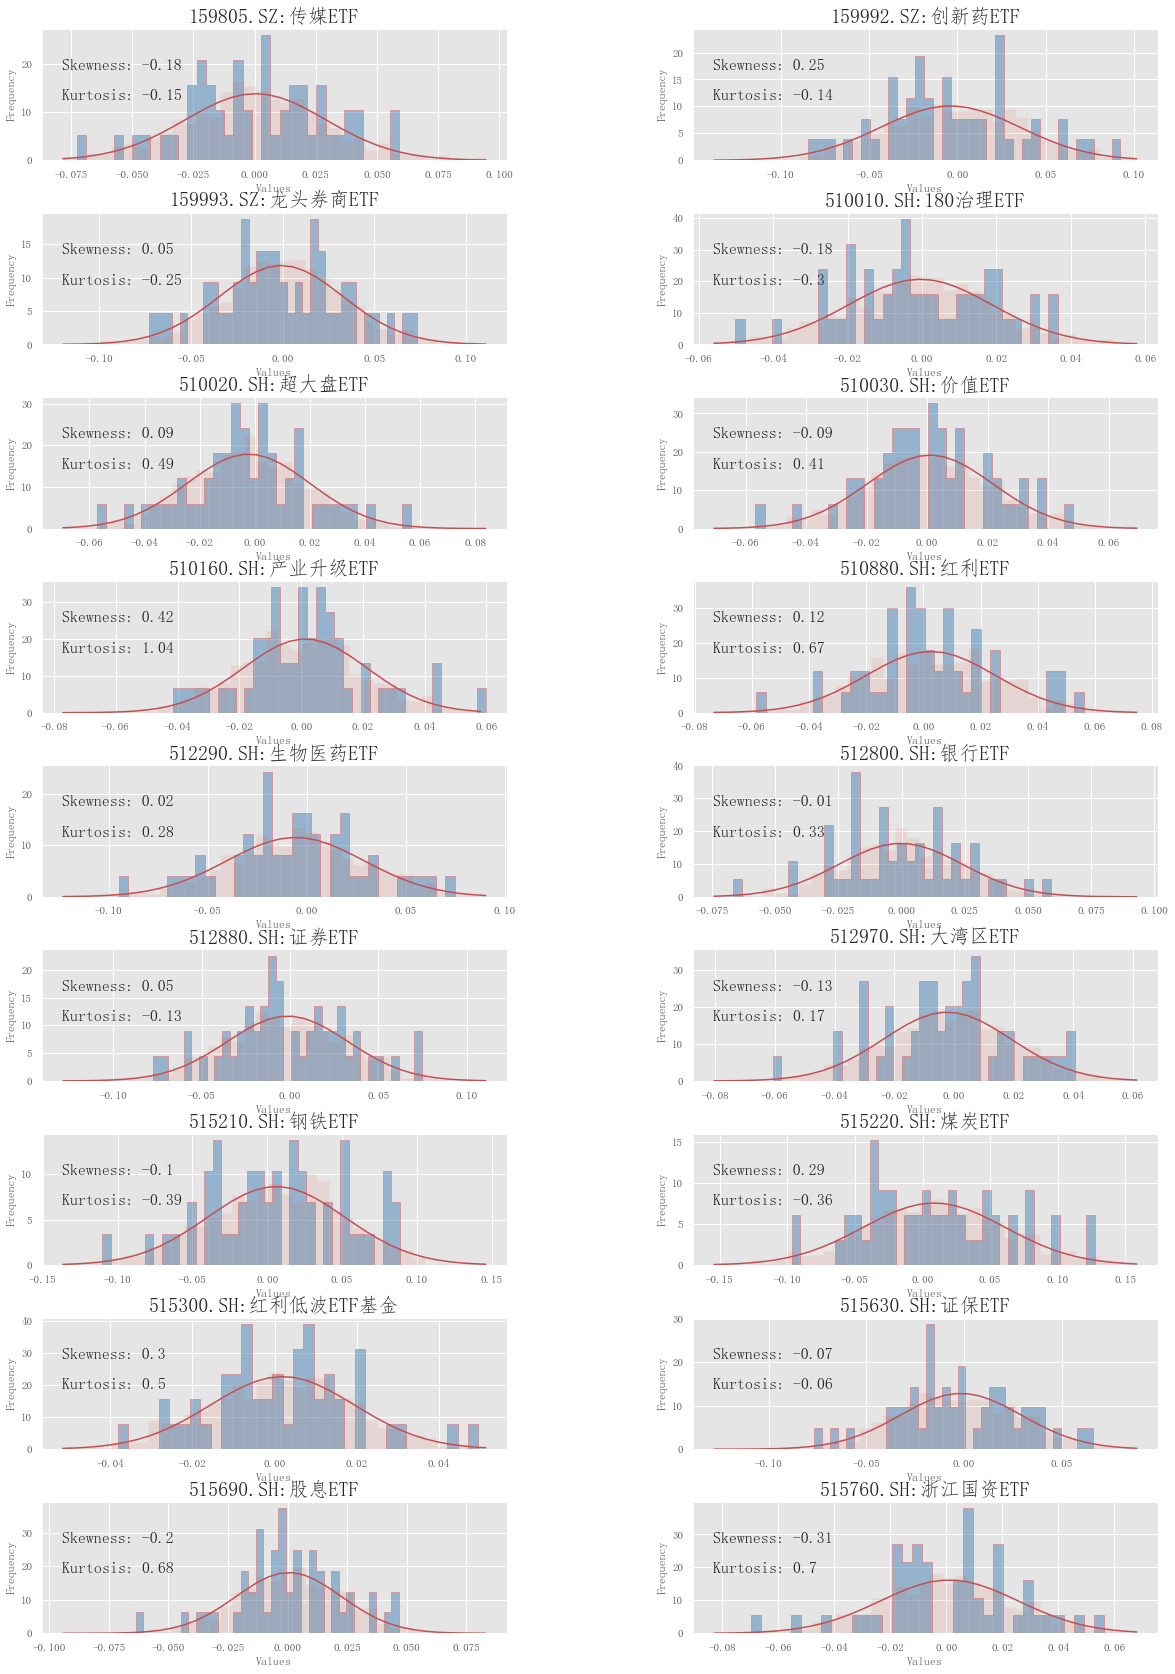

In [46]:
import pylab as mpl     #import matplotlib as mpl
import matplotlib.ticker as ticker
import random 
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

binsnumber = 35


fig3, ax = plt.subplots(figsize=(20,60))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
if (len(df.columns) % 2 ) == 0:
    m = len(df.columns)
else:
    m = int(round(len(df.columns),-1))

for i in range(0,len(df.columns)):
    plt.subplot(m,2,i+1)    
    ax = plt.gca()

    ax.hist(df_returns[df_returns.columns[i]], bins=binsnumber, color='steelblue', density = True,
        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

    sigma, mu = df_returns[df_returns.columns[i]].std(),df_returns[df_returns.columns[i]].mean() # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

    ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(df_returns[df_returns.columns[i]].skew(),2),round(df_returns[df_returns.columns[i]].kurtosis(),2)),
                xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=16)

    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(df_returns.columns[i],fontsize =20)
plt.show()
fig3.savefig('D:\\Quant_Code\\data\\plot_ETF\\distribution.png')


C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


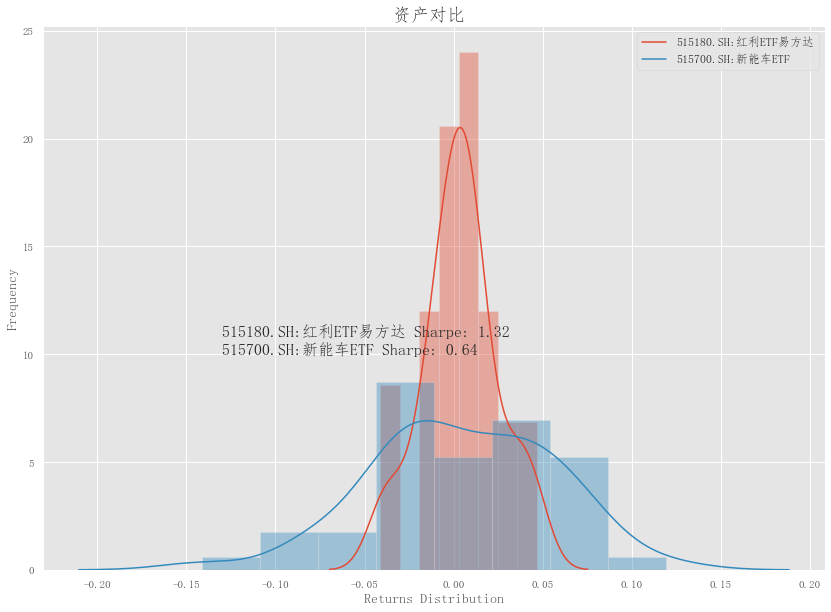

In [11]:

fig4 = plt.figure(figsize=(14,10))
sns.distplot(df_returns['515180.SH:红利ETF易方达'])
sns.distplot(df_returns['515700.SH:新能车ETF'])
plt.legend(('515180.SH:红利ETF易方达','515700.SH:新能车ETF'),fontsize = 12)

# anotate an important value
plt.annotate('515180.SH:红利ETF易方达 Sharpe: {}\n515700.SH:新能车ETF Sharpe: {}'.format(round(stats.loc['515180.SH:红利ETF易方达','Sharpe Ratio'],2),round(stats.loc['515700.SH:新能车ETF','Sharpe Ratio'],2)),
            xy=(-.15,8),xycoords = 'data',xytext =(-.13, 10),fontsize=16)
plt.title('资产对比 ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)
    

C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


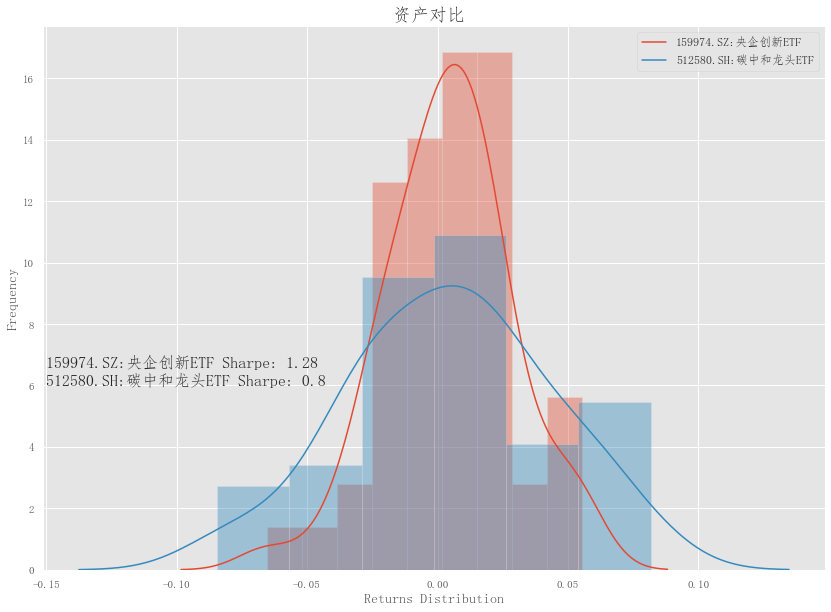

In [12]:
fig5 = plt.figure(figsize=(14,10))
sns.distplot(df_returns['159974.SZ:央企创新ETF'])
sns.distplot(df_returns['512580.SH:碳中和龙头ETF'])

plt.legend(('159974.SZ:央企创新ETF','512580.SH:碳中和龙头ETF'),fontsize = 12)

# anotate an important value
plt.annotate('159974.SZ:央企创新ETF Sharpe: {}\n512580.SH:碳中和龙头ETF Sharpe: {}'.format(round(stats.loc['159974.SZ:央企创新ETF','Sharpe Ratio'],2),
                        round(stats.loc['512580.SH:碳中和龙头ETF','Sharpe Ratio'],2)),
            xy=(-.15,4),xycoords = 'data',xytext =(-.15, 6),fontsize=16)
plt.title('资产对比 ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)

In [49]:
filt = (stats['Sharpe Ratio'] > 0 ) & (stats['Annualized Returns(%)'] > 5.5) 
len(list(stats[filt].index))

6

In [15]:
# stats[filt].style.bar(color=['red','green'], align='zero')
# cols = ['515220.SH:煤炭ETF','515210.SH:钢铁ETF','159804.SZ:创中盘88ETF','515080.SH:中证红利ETF','515700.SH:新能车ETF','159974.SZ:央企创新ETF','515180.SH:红利ETF易方达',
#         '512580.SH:碳中和龙头ETF','515790.SH:光伏ETF','515890.SH:红利ETF博时','159982.SZ:中证500ETF鹏华','511380.SH:可转债ETF','511180.SH:上证可转债ETF','511220.SH:城投债ETF']

In [50]:
df_returns.corr('pearson')

,159805.SZ:传媒ETF,159992.SZ:创新药ETF,159993.SZ:龙头券商ETF,510010.SH:180治理ETF,510020.SH:超大盘ETF,510030.SH:价值ETF,510160.SH:产业升级ETF,510880.SH:红利ETF,512290.SH:生物医药ETF,512800.SH:银行ETF,512880.SH:证券ETF,512970.SH:大湾区ETF,515210.SH:钢铁ETF,515220.SH:煤炭ETF,515300.SH:红利低波ETF基金,515630.SH:证保ETF,515690.SH:股息ETF,515760.SH:浙江国资ETF
159805.SZ:传媒ETF,1.000000,0.128728,0.516046,0.377945,0.409693,0.404302,0.455910,0.376239,0.112342,0.294228,0.515596,0.389845,0.181634,0.237957,0.372969,0.525493,0.429617,0.563454
159992.SZ:创新药ETF,0.128728,1.000000,0.364363,0.127024,0.578301,0.162259,0.210976,0.062061,0.938622,0.214068,0.336676,0.550182,-0.047743,0.069537,0.085677,0.329380,0.176972,0.525874
159993.SZ:龙头券商ETF,0.516046,0.364363,1.000000,0.583383,0.678868,0.686892,0.648689,0.488861,0.365538,0.444485,0.995890,0.616076,0.264519,0.333241,0.572479,0.974281,0.513441,0.674476
510010.SH:180治理ETF,0.377945,0.127024,0.583383,1.000000,0.517691,0.762814,0.671804,0.502706,0.131271,0.625903,0.569215,0.501206,0.296083,0.297298,0.680632,0.634443,0.628323,0.601154
510020.SH:超大盘ETF,0.409693,0.578301,0.678868,0.517691,1.000000,0.644517,0.628068,0.346536,0.575223,0.535745,0.664499,0.741684,0.057241,0.221579,0.525026,0.683410,0.490096,0.749146
510030.SH:价值ETF,0.404302,0.162259,0.686892,0.762814,0.644517,1.000000,0.796109,0.727723,0.116858,0.790197,0.681226,0.430149,0.455798,0.538754,0.868358,0.739147,0.793572,0.749342
510160.SH:产业升级ETF,0.455910,0.210976,0.648689,0.671804,0.628068,0.796109,1.000000,0.778397,0.183865,0.471863,0.630994,0.427362,0.607685,0.648981,0.766067,0.665465,0.764401,0.656845
510880.SH:红利ETF,0.376239,0.062061,0.488861,0.502706,0.346536,0.727723,0.778397,1.000000,0.061981,0.508281,0.483227,0.097795,0.749893,0.820896,0.709135,0.534845,0.883160,0.496653
512290.SH:生物医药ETF,0.112342,0.938622,0.365538,0.131271,0.575223,0.116858,0.183865,0.061981,1.000000,0.139074,0.341343,0.540596,-0.046227,0.031421,0.036836,0.336946,0.153201,0.487340
512800.SH:银行ETF,0.294228,0.214068,0.444485,0.625903,0.535745,0.790197,0.471863,0.508281,0.139074,1.000000,0.433507,0.393506,0.239435,0.302262,0.641084,0.496903,0.639327,0.605331


In [53]:

weights = np.random.random(18)
weights /=  np.sum(weights)
index =list(df_returns.columns)
allocation = pd.DataFrame(data=weights,index=index ,columns =['s'])
allocation

,s
159805.SZ:传媒ETF,0.047710
159992.SZ:创新药ETF,0.030722
159993.SZ:龙头券商ETF,0.067174
510010.SH:180治理ETF,0.112032
510020.SH:超大盘ETF,0.038332
510030.SH:价值ETF,0.031358
510160.SH:产业升级ETF,0.114969
510880.SH:红利ETF,0.017754
512290.SH:生物医药ETF,0.007024
512800.SH:银行ETF,0.113088


In [54]:
Expected_Return_s = np.sum(df_returns.mean()* allocation.s)* 52


In [55]:
print('Expected_Return_s:',Expected_Return_s)


Expected_Return_s: 0.004308661482852503


In [57]:
Expected_Std_s = np.sqrt(np.dot(allocation.s.T,np.dot(
                                                        df_returns.cov()*52,
                                                        allocation.s))
                        )

print('Expected_Std_s:',Expected_Std_s)


Expected_Std_s: 0.1389295164909533


In [58]:
Sharpe_s = Expected_Return_s / Expected_Std_s

print('Sharpe_s:',Sharpe_s)


Sharpe_s: 0.03101329070797616


Text(0.5, 1.0, 'Monte Carlo Simulation Efficient Frontier with EM')

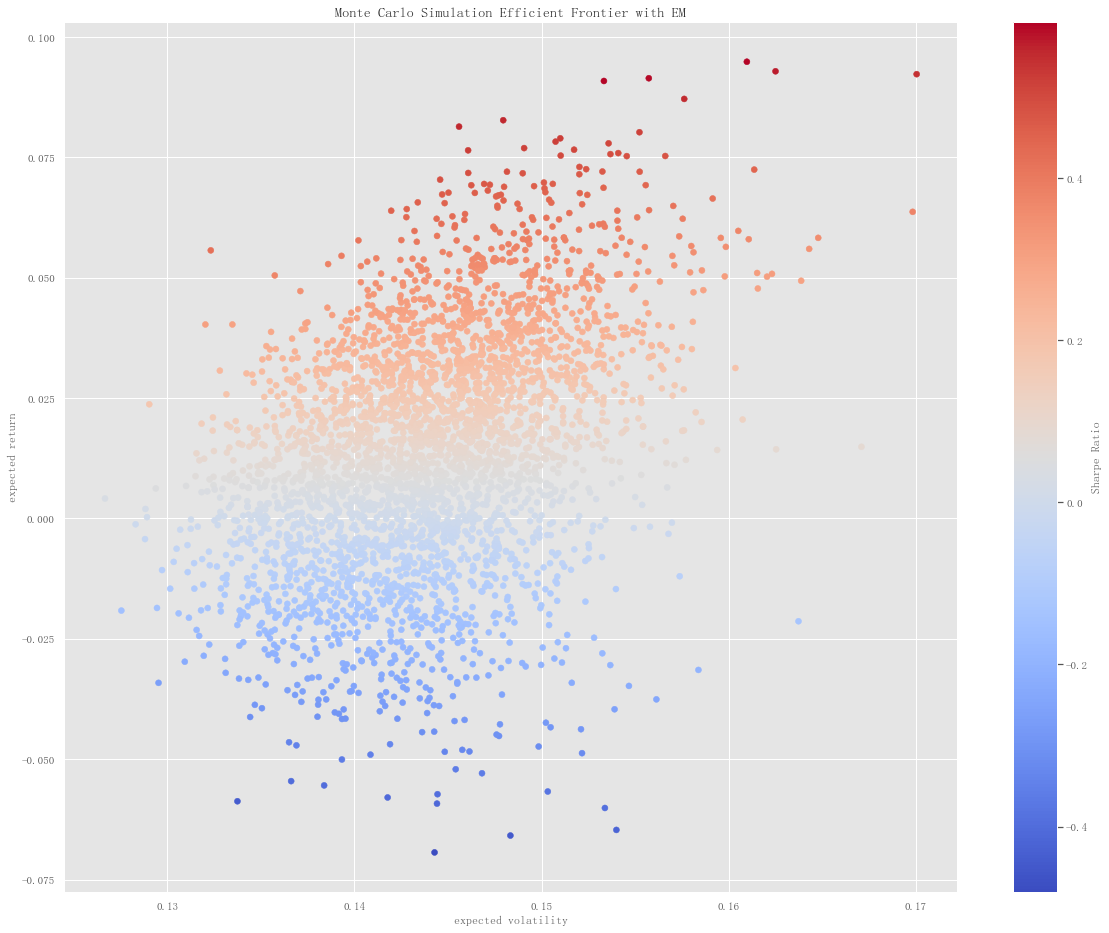

In [60]:
prets = []
pvols = []

for p in range(3500):
    weights = np.random.random(len(allocation))
    weights /= np.sum(weights)
    
    Expected_Return_s = np.sum(df_returns.mean()* weights)* 52
    Expected_Std_s = np.sqrt(np.dot(weights.T,np.dot( df_returns.cov()*52,
                                                        weights))
                        )

    prets.append(Expected_Return_s)
    pvols.append(Expected_Std_s )
    if ((Expected_Return_s > 0.24) & (Expected_Return_s < 0.25)) & ((Expected_Std_s < 0.18 )& (Expected_Std_s > 0.17)):
        print('Expected_Return_s:',round(Expected_Return_s,2))
        print('Expected_Std_s:',round(Expected_Std_s,2))
        print('sharp ratio:',round(Expected_Std_s / Expected_Std_s,2))
        print('weights:',[round(i,2) for i in weights])
        print('*****************')
        w = [round(i,2) for i in weights]
    

prets = np.array(prets)
pvols = np.array(pvols)

# the charts

fig8 = plt.figure(figsize = (20,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(111)

plt.scatter(pvols, prets, c = prets / pvols, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with EM')





In [41]:
pd.DataFrame(data=w,index=index ,columns =['s'])

,s
515220.SH:煤炭ETF,0.15
515210.SH:钢铁ETF,0.09
159804.SZ:创中盘88ETF,0.06
515080.SH:中证红利ETF,0.11
515700.SH:新能车ETF,0.08
159974.SZ:央企创新ETF,0.08
515180.SH:红利ETF易方达,0.01
512580.SH:碳中和龙头ETF,0.07
515790.SH:光伏ETF,0.14
515890.SH:红利ETF博时,0.02


In [28]:
pvols

array([0.15767947, 0.15767947, 0.15767947, ..., 0.15767947, 0.15767947,
       0.15767947])